# CAO Points Notebook
***

This Jupyter notebook will contain a clear and concise overview of how to load CAO points information from the
CAO website into a pandas data frame, a detailed comparison of CAO points in 2019, 2020, and 2021 and some visualisations to enhance the viewer experience.  

The notebook is broken down into four sections:  
- Section 1: Loading the CAO Points into Pandas Dataframes  
- Section 2: Creating a Single CAO Points Dataframe Using Concat & Join  
- Section 3: Creating a Function to Perform the Analysis  
- Section 4: Analysing CAO Points  

A list of references consulted over the course of compiling this notebook is provide at the end.  

<br>

### Required Modules
***

In [1]:
# Convenient HTTP requests
import requests as rq # Requests

# Regular Expressions
import re # Regular Expressions

# Dates and times
import datetime as dt

# Pandas for dataframes
import pandas as pd

# For downloading files
import urllib.request as urlrq

# Numpy for numerical operations
import numpy as np

# Pyplot for plots
import matplotlib.pyplot as plt

<br>

***
### Section 1: Loading the CAO Points into Pandas Dataframes 
***

In this first section, I load the level 8 CAO points for 2019, 2020 & 2021 into individual dataframes. A different method was used for each year's points, as detailed below.

<br>

##### 2021 Level 8 Points
[https://www.cao.ie/index.php?page=points&p=2021&bb=points](https://www.cao.ie/index.php?page=points&p=2021&bb=points)
***

In [2]:
# Fetch the CAO URL
resp = rq.get('http://www2.cao.ie/points/l8.php')
# Testing this request - we want to get 200 back to confirm everything is OK
resp

<Response [200]>

In [3]:
# Get the current date and time
now = dt.datetime.now()

# Save the date and time as a string so it can be reused
now_str = now.strftime('%Y%m%d_%H%M%S')

# Create a file path for the original data using the date and time
path21 = 'data/cao2021_' + now_str + '.html'

In [4]:
# Server uses the wrong encoding, we need to change it from iso-8859-1 to cp1252
original_encoding = resp.encoding
original_encoding
resp.encoding = 'cp1252'

In [5]:
# Save the file
with open(path21, 'w') as f:
    f.write(resp.text)

In [6]:
# Compile the regular expression for matching only lines with course info
re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.{1,53})   +(.{0,5})  +(.{0,5})')

In [7]:
# Loop through the lines of the response content
no_lines = 0
for line in resp.iter_lines():
    if re_course.match(line.decode('iso-8859-1')):
        #print(line)
        no_lines = no_lines +1
      
# Check how many lines are being captured - manual checks showed this should be 949
print (no_lines)

949


In [8]:
csv_path = 'data/cao2021_re_' + now_str + '.csv'
with open(csv_path,'w') as f:
    
    # Now loop through and print out the lines matching the RE
    for line in resp.iter_lines():
        if re_course.match(line.decode('cp1252')):
            csv_version = re_course.sub(r'\1,\2,\3,\4', line.decode('cp1252')).strip()
            #print(csv_version)
            #print(line)
            f.write(csv_version + '\n')

In [9]:
# Create a dataframe for the 2021 data with column names
df21 = pd.read_csv(csv_path, header=None, names=["Course_Code", "Course_Title", "Points_R1", "Points_R2"])

# Show the first 5 rows of the new dataframe
df21.head()

,Course_Code,Course_Title,Points_R1,Points_R2
0,AL801,Software Design for Virtual Reality and Gaming...,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructur...,321,NaN
4,AL810,Quantity Surveying ...,328,NaN


<br>

##### 2020 Level 8 Points
[https://www.cao.ie/index.php?page=points&p=2020&bb=points](https://www.cao.ie/index.php?page=points&p=2020&bb=points)
***

In [10]:
# Create a filepath for the 2020 points file
path20 = 'data/cao2020_' + now_str + '.xlsx'

# Save original data file to disk
urlrq.urlretrieve('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx',path20)

('data/cao2020_20220102_140542.xlsx',
 <http.client.HTTPMessage at 0x113a454f970>)

In [11]:
# Download and parse the excel spreadsheet into a dataframe
df20 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx',skiprows=10)

# Show the first 5 rows of the dataframe
df20.head()

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Create a filepath for the pandas dataframe
dfpath20 = 'data/cao2020_df' + now_str + '.csv'

# Save the dataframe
df20.to_csv(dfpath20)

<br>

##### 2019 Level 8 Points
[http://www.cao.ie/index.php?page=points&p=2019](http://www.cao.ie/index.php?page=points&p=2019)
***

##### Steps to Reproduce Data
1. Download pdf from the CAO website (see link above)  
2. Open pdf in Microsoft Word  
3. Save file in .docx format  
4. Save another copy of the word doc for editing  
5. Delete headers and footers  
6. Delete preamble on first page  
7. Select all and copy  
8. Paste into Notepad++  
9. Cut HEI names and paste onto beginning of each applicable course line, followed by a tab  
10. Delete blank lines
11. Replace double tabs with a single tab  
12. Change backticks to apostrophes  

In [13]:
# Read in the data
df19 = pd.read_csv("data/cao2019_03112021.csv", sep='\t')

# Show the first 5 rows
df19.head()

,HEI,Course Code,INSTITUTION and COURSE,EOS,Mid
0,Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,Athlone Institute of Technology,AL802,Software Design with Cloud Computing,301,306.0
2,Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure,329,442.0
4,Athlone Institute of Technology,AL810,Quantity Surveying,307,349.0


<br>

***
### Section 2: Creating a Single CAO Points Dataframe Using Concat & Join
***

In this section, we're going to take each of the individual dataframes created in section 1, make some adjustments to the column names and then combine them all into a single dataframe for use in our analysis.  

<br>

##### Using Concat & Duplicate on the Dataframes
***

In [14]:
# Create a dataframe for 2021 using just the course code and title columns
courses21 = df21[["Course_Code", "Course_Title"]]

# Take a quick peak
courses21.head()

,Course_Code,Course_Title
0,AL801,Software Design for Virtual Reality and Gaming...
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructur...
4,AL810,Quantity Surveying ...


In [15]:
# Doing the same thing for 2020
courses20 = df20[["COURSE CODE2", "COURSE TITLE"]]

# Change the column names to match the 2021 df
courses20.columns = ["Course_Code", "Course_Title"]

# Take a look
courses20.head()

,Course_Code,Course_Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...


In [16]:
# Aaaaaaand same again for 2019
courses19 = df19[["Course Code", "INSTITUTION and COURSE"]]

# Change the colum names to match the 2021 df
courses19.columns = ["Course_Code", "Course_Title"]

# What does that look like?
courses19.head()

,Course_Code,Course_Title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying


In [17]:
# Combine the 3 dfs into 1 with concat
all_courses = pd.concat([courses21, courses20, courses19], ignore_index=True)
all_courses.head()

,Course_Code,Course_Title
0,AL801,Software Design for Virtual Reality and Gaming...
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructur...
4,AL810,Quantity Surveying ...


At this point, it would be useful to know how many courses are duplicated in the dataframe.

In [18]:
# How many courses are duplicated?
all_courses[all_courses.duplicated()].count()

Course_Code     679
Course_Title    679
dtype: int64

In [19]:
# This code would return a copy of the df with duplicates removed
# all_courses.drop_duplicates(ignore_index=True)

# And this would return all courses where course code was duplicated (i.e. course was available each year)
# all_courses[all_courses.duplicated(subset=["Course_Code"])]

# I could store this in a varibale in case it is needed for analysis later
# courses_each_year = all_courses[all_courses.duplicated(subset=["Course_Code"])]

# Using sort will show that the course names varied slightly year on year
all_courses.sort_values('Course_Code')

,Course_Code,Course_Title
175,AC120,International Business ...
949,AC120,International Business
2581,AC120,International Business
950,AC137,Liberal Arts
2582,AC137,Liberal Arts
...,...,...
2412,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering ...
3342,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education ...


<br>

##### Using Join Method on the Dataframes
***

In [20]:
# Set course code as the index
all_courses.set_index("Course_Code",inplace=True)

# Set course code as index & tweak column names on df21
df21.columns = ["Course_Code", "Course_Title", "2021_Points_R1", "2021_Points_R2"]
df21.set_index("Course_Code",inplace=True)

In [21]:
# Creating new dataframe for all courses by joining existing df to column 2021_Points_R1
df_allcourses = all_courses.join(df21[["2021_Points_R1","2021_Points_R2"]])
df_allcourses.head()

,Course_Title,2021_Points_R1,2021_Points_R2
Course_Code,,,
AC120,International Business ...,294,294
AC120,International Business,294,294
AC120,International Business,294,294
AC137,Liberal Arts ...,271,270
AC137,Liberal Arts,271,270


In [22]:
# Columns are messy in df20 - make a new df for 2020 points with just course code, R1 & R2 Points
df20_r1r2=df20[["COURSE CODE2", "R1 POINTS", "R2 POINTS"]]

# Change the column names to match df21
df20_r1r2.columns = ["Course_Code","2020_Points_R1", "2020_Points_R2"]
df20_r1r2.head()

,Course_Code,2020_Points_R1,2020_Points_R2
0,AC120,209,NaN
1,AC137,252,NaN
2,AD101,#+matric,NaN
3,AD102,#+matric,NaN
4,AD103,#+matric,NaN


In [23]:
# Set Course Code as the index
df20_r1r2.set_index("Course_Code",inplace=True)

In [24]:
# Join to the df20_r1 df
df_allcourses = df_allcourses.join(df20_r1r2)
df_allcourses.head()

,Course_Title,2021_Points_R1,2021_Points_R2,2020_Points_R1,2020_Points_R2
Course_Code,,,,,
AC120,International Business ...,294,294,209,NaN
AC120,International Business,294,294,209,NaN
AC120,International Business,294,294,209,NaN
AC137,Liberal Arts ...,271,270,252,NaN
AC137,Liberal Arts,271,270,252,NaN


In [25]:
# Doing the same for 2019 points - making a new df with just course code. R1 & R2 points
df19_r1r2=df19[["Course Code", "Mid", "EOS"]] # Mid looks like it was the R1 Points, EOS R2

# Change the column names to match df21
df19_r1r2.columns = ["Course_Code","2019_Points_R1", "2019_Points_R2"]
df19_r1r2.head()

,Course_Code,2019_Points_R1,2019_Points_R2
0,AL801,328.0,304
1,AL802,306.0,301
2,AL803,337.0,309
3,AL805,442.0,329
4,AL810,349.0,307


In [26]:
# Setting course code as the index
df19_r1r2.set_index("Course_Code",inplace=True)

In [27]:
# Join to the df20_r1 df
df_allcourses = df_allcourses.join(df19_r1r2)

# Now we can have a look at the new df with R1 points from each of the 3 years
df_allcourses.head(10)

,Course_Title,2021_Points_R1,2021_Points_R2,2020_Points_R1,2020_Points_R2,2019_Points_R1,2019_Points_R2
Course_Code,,,,,,,
AC120,International Business ...,294,294,209,NaN,269.0,234
AC120,International Business,294,294,209,NaN,269.0,234
AC120,International Business,294,294,209,NaN,269.0,234
AC137,Liberal Arts ...,271,270,252,NaN,275.0,252
AC137,Liberal Arts,271,270,252,NaN,275.0,252
AC137,Liberal Arts,271,270,252,NaN,275.0,252
AD101,First Year Art and Design (Common Entry portfo...,#554,NaN,#+matric,NaN,550.0,# +mat
AD101,"First Year Art & Design (Common Entry,portfolio)",#554,NaN,#+matric,NaN,550.0,# +mat
AD101,First Year Art & Design (Common Entry),#554,NaN,#+matric,NaN,550.0,# +mat


<br>

##### Tidying Up the Dataframe
***

In [28]:
# Using describe to get a general idea of what's in the dataframe
df_allcourses.describe()

,2019_Points_R1
count,2437.000000
mean,428.504309
std,130.640140
min,57.000000
25%,345.000000
50%,401.000000
75%,487.000000
max,1073.000000


In [29]:
# Sorting by course code
df_allcourses = df_allcourses.sort_values("Course_Code")

In [30]:
# Removing duplicates by each column except course title, keeping first iteration
# Adapted from: https://stackoverflow.com/questions/13035764/remove-pandas-rows-with-duplicate-indices
df_allcourses = df_allcourses.drop_duplicates(subset = ("2021_Points_R1", "2021_Points_R2", "2020_Points_R1", 
                              "2020_Points_R2", "2019_Points_R1", "2019_Points_R2"), keep = "first", ignore_index=False)

In [31]:
# Using describe again to see the difference
df_allcourses.describe()

,2019_Points_R1
count,914.000000
mean,426.114880
std,132.906752
min,57.000000
25%,339.000000
50%,395.000000
75%,477.000000
max,1073.000000


In [32]:
# Create a filepath for the final dataframe
savepath = 'data/df_allcourses.csv'

# Save the dataframe
df_allcourses.to_csv(savepath)

<br>

***
### Section 3: Creating a Function to Perform the Analysis
***

This section contains the code used to analyse the CAO Points in 2019, 2020 and 2021, which has been stored in a function called analysis(). To see the output, please proceed to Section 4.  

In [33]:
def analysis():
    # Reading in the data from the csv file & savepath created above
    savepath = 'data/df_allcourses.csv'
    df_allcourses = pd.read_csv(savepath, index_col=0) 
    
    # Print out # of courses available each year
    print ("ANALYSING CAO POINTS")
    print ("\n")
    print ("*****\nNUMBER OF COURSES AVAILABLE IN EACH YEAR\n*****")
    print("2021:", df_allcourses.value_counts("2021_Points_R1").sum())
    print("2020:", df_allcourses.value_counts("2020_Points_R1").sum())
    print("2019:", df_allcourses.value_counts("2019_Points_R1").sum())
    print ("\n")
    
    # Saving those figures in variables for use in plot
    courses19 = df_allcourses.value_counts("2019_Points_R1").sum()
    courses20 = df_allcourses.value_counts("2020_Points_R1").sum()
    courses21 = df_allcourses.value_counts("2021_Points_R1").sum()
    
    print("We can see that in 2021, there were", (courses20 - courses21), "fewer CAO courses available than in 2020")
    print("However, the number of courses available has increased overall by", (courses21 - courses19), "since 2019")
    print("\n")
    print("The variation in the number of courses available is shown in the following plot:")
    print("\n")
    
    # Plotting those values - setting the style, figure size, and giving plot a title
    plt.style.use("seaborn")
    plt.rcParams['figure.figsize'] = [10, 7]
    
    no_courses = (courses19, courses20, courses21)
    years = ("2019", "2020", "2021")
    
    plt.bar(years, no_courses)
    plt.title("CAO Courses Available in Each Year")
    plt.show()
    
    print ("\n")
        
    # Using loc to show courses with AQA
    print ("*****\nAQA (ALL QUALIFIED APPLICANTS)\n*****")
    print ("Here are the courses where All Qualified Applicants were offered a place in 2021 & 2020:")
    print ("\n")
    print ("2021:")
    print (df_allcourses.loc[df_allcourses["2021_Points_R2"] == "AQA", "Course_Title"])
    print ("\n")
    print ("2020:")
    print (df_allcourses.loc[df_allcourses["2020_Points_R1"] == "AQA", "Course_Title"])
    print ("\n")
    print ("NOTE: no AQA values were observed in the 2019 points data.")
    
    # Telling pandas to not diplay decimal places 
    # found at https://newbedev.com/pandas-converting-floats-to-strings-without-decimals
    pd.options.display.float_format = '{:,.0f}'.format
    
    # Converting all columns to float
    # Adapted from: https://datatofish.com/string-to-integer-dataframe/
    df_allcourses["2021_Points_R1"] = pd.to_numeric(df_allcourses["2021_Points_R1"], errors = "coerce").fillna(np.nan)
    df_allcourses["2021_Points_R2"] = pd.to_numeric(df_allcourses["2021_Points_R2"], errors = "coerce").fillna(np.nan)
    df_allcourses["2020_Points_R1"] = pd.to_numeric(df_allcourses["2020_Points_R1"], errors = "coerce").fillna(np.nan)
    df_allcourses["2020_Points_R2"] = pd.to_numeric(df_allcourses["2020_Points_R2"], errors = "coerce").fillna(np.nan)
    df_allcourses["2019_Points_R1"] = pd.to_numeric(df_allcourses["2019_Points_R1"], errors = "coerce").fillna(np.nan)
    df_allcourses["2019_Points_R2"] = pd.to_numeric(df_allcourses["2019_Points_R2"], errors = "coerce").fillna(np.nan)
    
    # Creating variables for min, max, mean, & median points in each year
    max2021 = df_allcourses['2021_Points_R1'].max()
    min2021 = df_allcourses['2021_Points_R2'].min()
    max2020 = df_allcourses['2020_Points_R1'].max()
    min2020 = df_allcourses['2020_Points_R2'].min()
    max2019 = df_allcourses['2019_Points_R1'].max()
    min2019 = df_allcourses['2019_Points_R2'].min()

    # Mean - rounding the values as I was getting values with several decimal places in testing
    mean2021r1 = round(df_allcourses['2021_Points_R1'].mean(),2)
    mean2020r1 = round(df_allcourses['2020_Points_R1'].mean(),2)
    mean2019r1 = round(df_allcourses['2019_Points_R1'].mean(),2)
    mean2021r2 = round(df_allcourses['2021_Points_R2'].mean(),2)
    mean2020r2 = round(df_allcourses['2020_Points_R2'].mean(),2)
    mean2019r2 = round(df_allcourses['2019_Points_R2'].mean(),2)
    
    # Median
    median2021r1 = df_allcourses['2021_Points_R1'].median()
    median2020r1 = df_allcourses['2020_Points_R1'].median()
    median2019r1 = df_allcourses['2019_Points_R1'].median()
    median2021r2 = df_allcourses['2021_Points_R2'].median()
    median2020r2 = df_allcourses['2020_Points_R2'].median()
    median2019r2 = df_allcourses['2019_Points_R2'].median()

    # I had also calculated the mode but found this was not of any use due to NaN values
    # modevalues = df_allcourses.mode(axis = 0)
    
    # Using describe on the dataframe
    print ("\n")
    print ("*****\nGENERAL STATISTICS\n*****")
    print (df_allcourses.describe())
    print ("\n")
    
    # Showing mean and median points in rounds 1 & 2
    print ("*****\nMEAN & MEDIAN POINTS - ROUND 1 \n*****")
    print ("MEAN \n2021:", mean2021r1,"\t2020:", mean2020r1, "\t2019:", mean2019r1)
    print ("\n")
    print ("MEDIAN \n2021:", median2021r1, "\t2020:", median2020r1, "\t2019:", median2019r1)
    print ("\n")
    print ("*****\nMEAN & MEDIAN POINTS - ROUND 2 \n*****")
    print ("MEAN \n2021:", mean2021r2,"\t2020:", mean2020r2, "\t2019:", mean2019r2)
    print ("\n")
    print ("MEDIAN \n2021:", median2021r2, "\t2020:", median2020r2, "\t2019:", median2019r2)
    print ("\n")
    
    print ("From the below plots, we can see an overall increase in both the mean and median points required for entry to CAO courses between 2020 & 2021:")
    print ("\n")
    
    # Plotting mean across the 3 years
    meanr1 = (mean2019r1, mean2020r1, mean2021r1)
    meanr2 = (mean2019r2, mean2020r2, mean2021r2)
    r1label = ("Round 1")
    r2label = ("Round 2")
    xaxis_label = ("Years 2019, 2020 & 2021 (LTR)")
    
    plt.plot(meanr1, color = "r", label = r1label)
    plt.plot(meanr2, color = "b", label = r2label)
    
    # Adding labels, title and legend
    plt.xlabel(xaxis_label)
    plt.title("Mean CAO Points")
    plt.legend()
    plt.show()
    
    print ("\n")
        
    # Plotting mean across the 3 years
    medianr1 = (median2019r1, median2020r1, median2021r1)
    medianr2 = (median2019r2, median2020r2, median2021r2)
    r1label = ("Round 1")
    r2label = ("Round 2")
    xaxis_label = ("Years 2019, 2020 & 2021 (LTR)")
    
    plt.plot(medianr1, color = "g", label = r1label)
    plt.plot(medianr2, color = "y", label = r2label)
    
    # Adding labels, title and legend
    plt.xlabel(xaxis_label)
    plt.title("Median CAO Points")
    plt.legend()
    plt.show()
    
    print ("\n")
        
    # Using loc to display courses with highest and lowest points
    print ("*****\nCOURSES WITH HIGHEST & LOWEST POINTS\n*****")
    print ("2021: Highest Points")
    print (df_allcourses.loc[df_allcourses["2021_Points_R1"] == max2021, "Course_Title"])
    print ("Points:", max2021)
    print ("\n")
    print ("2021: Lowest Points")
    print (df_allcourses.loc[df_allcourses["2021_Points_R2"] == min2021, "Course_Title"])
    print ("Points:", min2021)
    print ("\n")
    print ("2020: Highest Points")
    print (df_allcourses.loc[df_allcourses["2020_Points_R1"] == max2020, "Course_Title"])
    print ("Points:", max2020)
    print ("\n")
    print ("2020: Lowest Points")
    print (df_allcourses.loc[df_allcourses["2020_Points_R2"] == min2020, "Course_Title"])
    print ("Points:", min2020)
    print ("\n")
    print ("2019: Highest Points")
    print (df_allcourses.loc[df_allcourses["2019_Points_R1"] == max2019, "Course_Title"])
    print ("Points:", max2019)
    print ("\n")
    print ("2019: Lowest Points")
    print (df_allcourses.loc[df_allcourses["2019_Points_R2"] == min2019, "Course_Title"])
    print ("Points:", min2019)
    print ("\n")
    
    # Dropping NaNs at this point as these can't be compared against each other
    df_allcourses = df_allcourses.dropna()
    
    # Redefining variables for min & max points in each year with NaN removed
    max2021 = df_allcourses['2021_Points_R1'].max()
    min2021 = df_allcourses['2021_Points_R2'].min()
    max2020 = df_allcourses['2020_Points_R1'].max()
    min2020 = df_allcourses['2020_Points_R2'].min()
    max2019 = df_allcourses['2019_Points_R1'].max()
    min2019 = df_allcourses['2019_Points_R2'].min()
    
    # Do the same as above, only without NaN values
    print ("NOTE: as the dataframe contains NaN values, it is difficult to compare all courses across the three years.")
    print ("If we were to remove the NaN values, these would be the courses with the highest and lowest points:")
    
    print ("\n")
    print ("2021: Highest Points")
    print (df_allcourses.loc[df_allcourses["2021_Points_R1"] == max2021, "Course_Title"])
    print ("Points:", max2021)
    print ("\n")
    print ("2021: Lowest Points")
    print (df_allcourses.loc[df_allcourses["2021_Points_R2"] == min2021, "Course_Title"])
    print ("Points:", min2021)
    print ("\n")
    print ("2020: Highest Points")
    print (df_allcourses.loc[df_allcourses["2020_Points_R1"] == max2020, "Course_Title"])
    print ("Points:", max2020)
    print ("\n")
    print ("2020: Lowest Points")
    print (df_allcourses.loc[df_allcourses["2020_Points_R2"] == min2020, "Course_Title"])
    print ("Points:", min2020)
    print ("\n")
    print ("2019: Highest Points")
    print (df_allcourses.loc[df_allcourses["2019_Points_R1"] == max2019, "Course_Title"])
    print ("Points:", max2019)
    print ("\n")
    print ("2019: Lowest Points")
    print (df_allcourses.loc[df_allcourses["2019_Points_R2"] == min2019, "Course_Title"])
    print ("Points:", min2019)
    print ("\n")
    print ("The above shows an increase in the points required for the course with the highest points:")
    print (df_allcourses.loc[df_allcourses["2021_Points_R1"] == max2021, "Course_Title"])
    print ("\n")
    print ("In 2019 the points required were", max2019,"\nThe points fell to", max2020,"in 2020 but again increased to",max2021,"in 2021.")
    print ("\n")
    
    print("This overall increase in points in 2021 is illustrated below:")
    print ("\n")

    # Creating variables for use in plot
    points21_r1 = df_allcourses['2021_Points_R1']
    points20_r1 = df_allcourses['2020_Points_R1']
    points19_r1 = df_allcourses['2019_Points_R1']
    
    points21_r2 = df_allcourses['2021_Points_R2']
    points20_r2 = df_allcourses['2020_Points_R2']
    points19_r2 = df_allcourses['2019_Points_R2']
    
    # Changing the style for the scatter plot
    plt.style.use('fivethirtyeight')
    
    # Plot a scatter plot showing the points in round 1 and 2 in each year
    plt.scatter(points19_r1, points19_r2, label = '2019', c ='red')
    plt.scatter(points20_r1, points20_r2, label = '2020', c = 'green')
    plt.scatter(points21_r1, points21_r2, label = '2021', c = 'blue')

    # Set the axis labels
    plt.xlabel('Round 1')
    plt.ylabel('Round 2')

    # Give the plot a legend and title
    plt.legend()
    plt.title('CAO Points: Round 1 & 2')
    plt.show()
    
    
    print ("\n")
    return print ("Analysis complete.")

<br>

***
### Section 4: Analysing CAO Points
***

Finally, in this section I call the analysis() function detailed above, which will analyse the CAO points in 2019, 2020 and 2021. The function will provide an overview of the number of courses available each year, the number of courses which accepted all qualified applicants, the mean and median points ranges for the three years, the courses with the highest and lowest points required for entry, and will display appropriate plots to enhance the viewer experience.

ANALYSING CAO POINTS


*****
NUMBER OF COURSES AVAILABLE IN EACH YEAR
*****
2021: 923
2020: 1181
2019: 914


We can see that in 2021, there were 258 fewer CAO courses available than in 2020
However, the number of courses available has increased overall by 9 since 2019


The variation in the number of courses available is shown in the following plot:




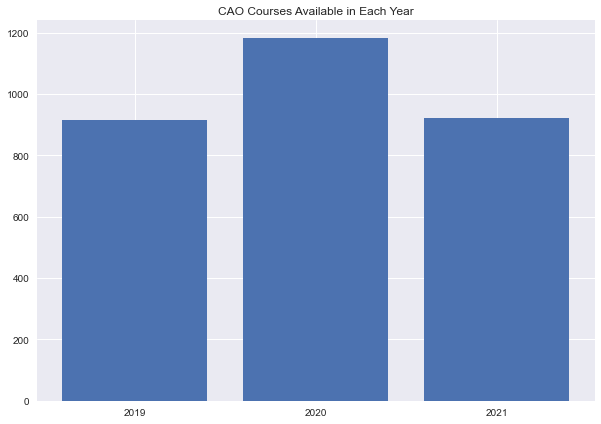



*****
AQA (ALL QUALIFIED APPLICANTS)
*****
Here are the courses where All Qualified Applicants were offered a place in 2021 & 2020:


2021:
Course_Code
MH801    Early Childhood - Teaching and Learning (part-...
Name: Course_Title, dtype: object


2020:
Course_Code
AL600                                      Software Design
AL601                                 Computer Engineering
AL604                                    Civil Engineering
TU772           Business (Common Entry with Award options)
WD003                                             Business
WD152    Visual Art                                    ...
WD200                                       Arts (options)
Name: Course_Title, dtype: object


NOTE: no AQA values were observed in the 2019 points data.


*****
GENERAL STATISTICS
*****
       2021_Points_R1  2021_Points_R2  2020_Points_R1  2020_Points_R2  \
count             775             193           1,153             301   
mean              381             369         

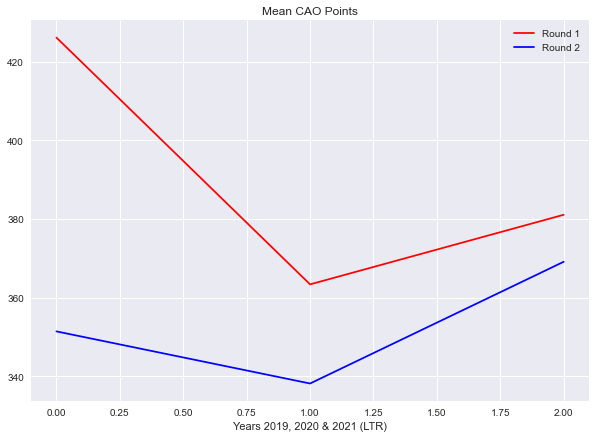

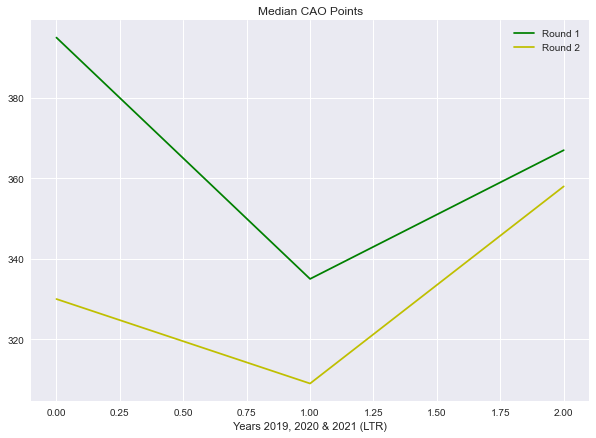



*****
COURSES WITH HIGHEST & LOWEST POINTS
*****
2021: Highest Points
Course_Code
GY303    Biomedical Science
Name: Course_Title, dtype: object
Points: 613.0


2021: Lowest Points
Course_Code
DB531    Marketing
Name: Course_Title, dtype: object
Points: 176.0


2020: Highest Points
Course_Code
CR125    Popular Music at CIT Cork School of Music     ...
Name: Course_Title, dtype: object
Points: 1088.0


2020: Lowest Points
Course_Code
DK712    Digital Marketing and Public Relations
Name: Course_Title, dtype: object
Points: 100.0


2019: Highest Points
Course_Code
DL831    Design for Stage and Screen (Production Design)
Name: Course_Title, dtype: object
Points: 1073.0


2019: Lowest Points
Course_Code
PC411    English and History (fulfils Teaching Council ...
Name: Course_Title, dtype: object
Points: 168.0


NOTE: as the dataframe contains NaN values, it is difficult to compare all courses across the three years.
If we were to remove the NaN values, these would be the courses with the hi

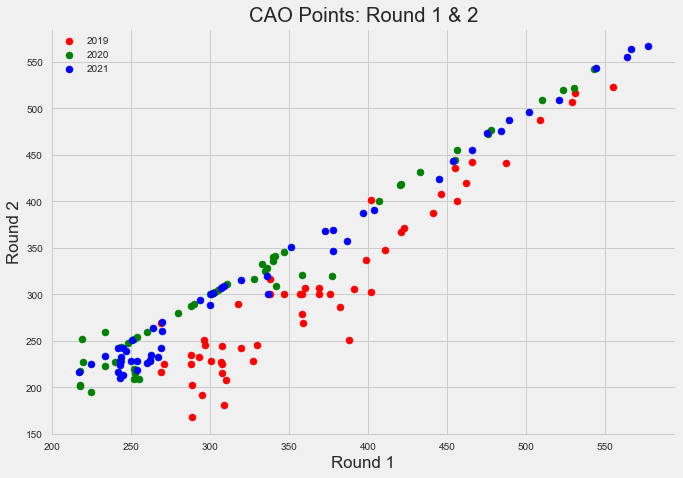



Analysis complete.


In [34]:
# Call the function
analysis()

<br>

### References
***

[1] https://datatofish.com/dropna/  

[2] https://datatofish.com/replace-values-pandas-dataframe/  

[3] https://discuss.analyticsvidhya.com/t/getting-typeerror-not-supported-between-instances-of-str-and-float/18535/19  

[4] https://www.geeksforgeeks.org/how-to-convert-floats-to-strings-in-pandas-dataframe/  

[5] https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/  

[6] https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python  

[7] https://newbedev.com/pandas-converting-floats-to-strings-without-decimals  

[8] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html  

[9] https://stackoverflow.com/questions/13035764/remove-pandas-rows-with-duplicate-indices  

[10] https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value  

<br>

# End
***